In [ ]:
import pandas as pd

In [2]:
#Reading the file with weather data for Biel I got from https://open-meteo.com/
weather_biel = pd.read_excel('open_meteo_biel2.xlsx')
weather_biel = weather_biel.rename(columns={'time': 'Date', 'temperature_2m_mean (°C)': 'Temperature', 'sunshine_duration (s)': 'Sunshine', 'precipitation_sum (mm)': 'Precipitation'})
weather_biel

,Date,Temperature,Sunshine,Precipitation
0,1950-01-16,1.2,16893.57,5.6
1,1950-01-17,-0.1,25001.29,5.0
2,1950-01-18,-1.0,20308.13,1.6
3,1950-01-19,-5.4,27469.43,0.3
4,1950-01-20,-8.8,27607.16,0.0
...,...,...,...,...
27555,2025-06-26,22.2,50527.34,14.2
27556,2025-06-27,21.9,43060.88,0.1
27557,2025-06-28,24.1,52937.33,0.0
27558,2025-06-29,25.7,52903.40,0.0


In [5]:
#Reading file for Montpellier
weather_montpellier = pd.read_excel('open-meteo-montpellier.xlsx')
weather_montpellier = weather_montpellier.rename(columns={'time': 'Date', 'temperature_2m_mean (°C)': 'Temperature', 'sunshine_duration (s)': 'Sunshine', 'precipitation_sum (mm)': 'Precipitation'})
weather_montpellier

,Date,Temperature,Sunshine,Precipitation
0,1950-01-16,6.2,29140.17,0.0
1,1950-01-17,6.0,29169.03,0.0
2,1950-01-18,5.7,29313.63,0.0
3,1950-01-19,2.9,29205.67,0.0
4,1950-01-20,0.8,29513.64,0.0
...,...,...,...,...
27555,2025-06-26,28.0,46646.89,0.2
27556,2025-06-27,29.5,50655.18,0.0
27557,2025-06-28,31.1,50653.07,0.0
27558,2025-06-29,30.4,50542.71,0.0


In [6]:
#Transforming numbers to dates
import datetime

weather_biel['Date'] = pd.to_datetime(weather_biel['Date'])
weather_biel['Year'] = weather_biel['Date'].dt.year
weather_biel['Month'] = weather_biel['Date'].dt.month

weather_montpellier['Date'] = pd.to_datetime(weather_montpellier['Date'])
weather_montpellier['Year'] = weather_montpellier['Date'].dt.year
weather_montpellier['Month'] = weather_montpellier['Date'].dt.month

In [7]:
#Get rid of 2025 data
weather_biel = weather_biel[weather_biel.Year != 2025]
weather_montpellier = weather_montpellier[weather_montpellier.Year != 2025]

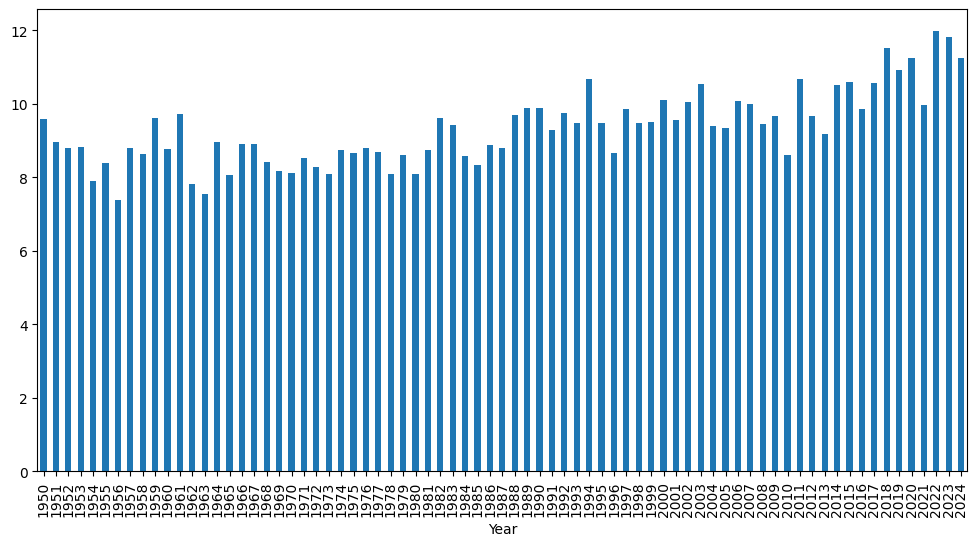

In [12]:
#Digging around, finding yearly average temperatures for Biel.
import matplotlib.pyplot as plt

yearly_avg = weather_biel.groupby('Year')['Temperature'].mean()

plt.figure(figsize=(12, 6))
yearly_avg.plot(kind='bar')
plt.show()

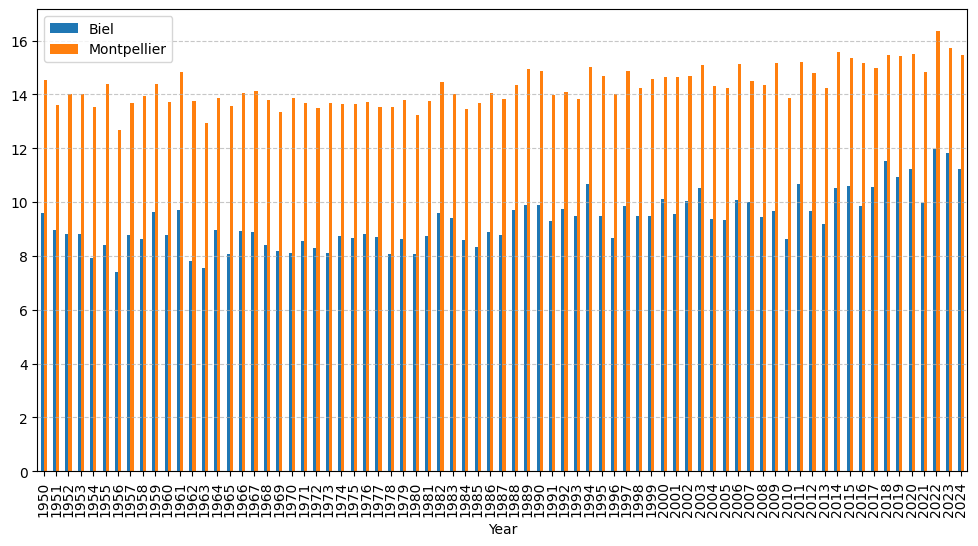

In [13]:
#Group by year for both dataframes, comparing average temperatures
yearly_avg_biel = weather_biel.groupby('Year')['Temperature'].mean()
yearly_avg_montpellier = weather_montpellier.groupby('Year')['Temperature'].mean()

combined = pd.DataFrame({
    'Biel': yearly_avg_biel,
    'Montpellier': yearly_avg_montpellier
})

plt.figure(figsize=(12, 6))
combined.plot(kind='bar', ax=plt.gca())  # Use the current axes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

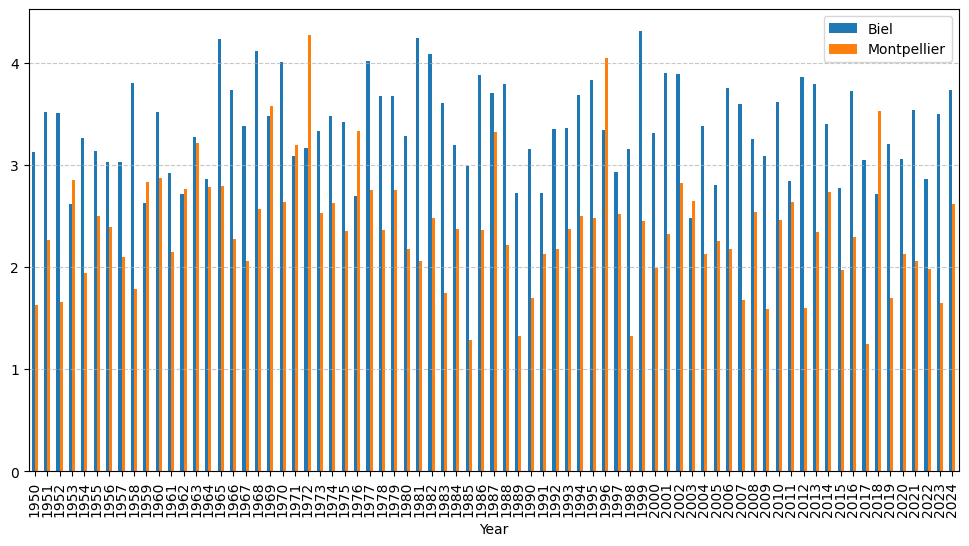

In [14]:
#Group by year for both dataframes, comparing average precipitation
yearly_avg_biel = weather_biel.groupby('Year')['Precipitation'].mean()
yearly_avg_montpellier = weather_montpellier.groupby('Year')['Precipitation'].mean()

combined = pd.DataFrame({
    'Biel': yearly_avg_biel,
    'Montpellier': yearly_avg_montpellier
})

plt.figure(figsize=(12, 6))
combined.plot(kind='bar', ax=plt.gca())  # Use the current axes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

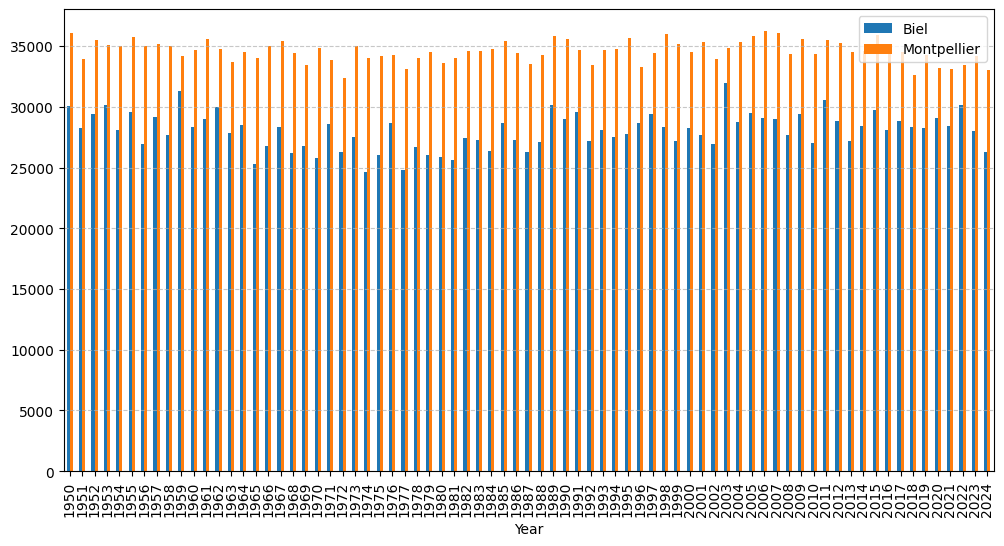

In [15]:
#Group by year for both dataframes, comparing average sunshine duration
yearly_avg_biel = weather_biel.groupby('Year')['Sunshine'].mean()
yearly_avg_montpellier = weather_montpellier.groupby('Year')['Sunshine'].mean()

combined = pd.DataFrame({
    'Biel': yearly_avg_biel,
    'Montpellier': yearly_avg_montpellier
})

plt.figure(figsize=(12, 6))
combined.plot(kind='bar', ax=plt.gca())  # Use the current axes
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

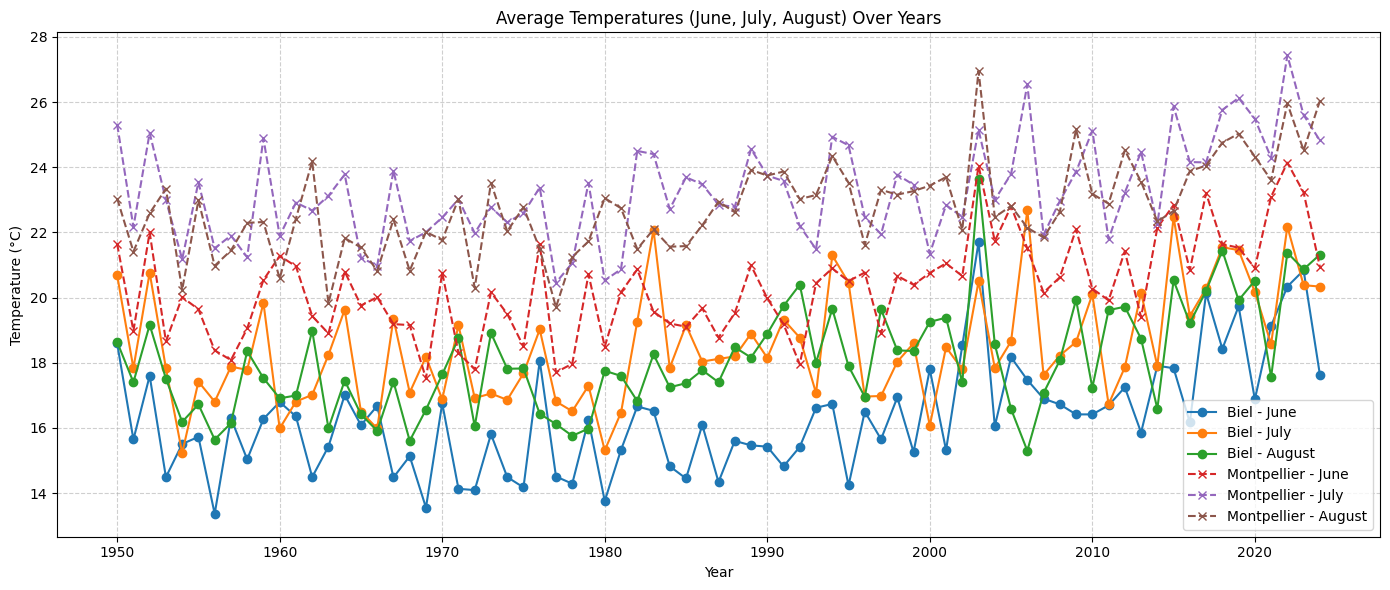

In [17]:
#After deciding to continue with temperatures: What do the summer months (June, July August) look like?

JJA_biel = weather_biel[weather_biel['Month'].isin([6, 7, 8])]
JJA_montpellier = weather_montpellier[weather_montpellier['Month'].isin([6, 7, 8])]

JJA_biel_mean = JJA_biel.groupby(['Year', 'Month'])['Temperature'].mean().unstack()
JJA_montpellier_mean = JJA_montpellier.groupby(['Year', 'Month'])['Temperature'].mean().unstack()

plt.figure(figsize=(14, 6))

plt.plot(JJA_biel_mean.index, JJA_biel_mean[6], label='Biel - June', linestyle='-', marker='o')
plt.plot(JJA_biel_mean.index, JJA_biel_mean[7], label='Biel - July', linestyle='-', marker='o')
plt.plot(JJA_biel_mean.index, JJA_biel_mean[8], label='Biel - August', linestyle='-', marker='o')

plt.plot(JJA_montpellier_mean.index, JJA_montpellier_mean[6], label='Montpellier - June', linestyle='--', marker='x')
plt.plot(JJA_montpellier_mean.index, JJA_montpellier_mean[7], label='Montpellier - July', linestyle='--', marker='x')
plt.plot(JJA_montpellier_mean.index, JJA_montpellier_mean[8], label='Montpellier - August', linestyle='--', marker='x')

plt.title('Average Temperatures (June, July, August) Over Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

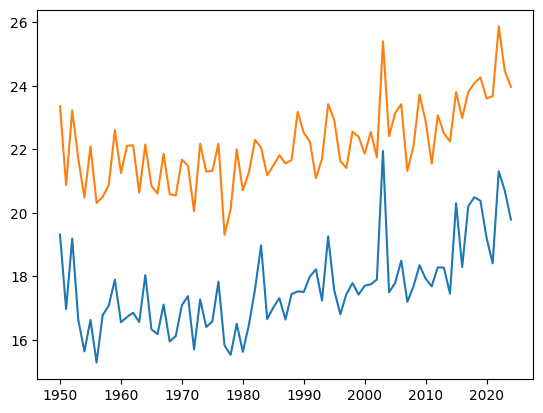

In [11]:
#Making it more readable and therefore combining the two dataframes

JJA_biel_mean = JJA_biel.groupby('Year')['Temperature'].mean()
JJA_montpellier_mean = JJA_montpellier.groupby('Year')['Temperature'].mean()

JJA_combined = pd.DataFrame({
    'Biel': JJA_biel_mean,
    'Montpellier': JJA_montpellier_mean
})

plt.plot(JJA_combined.index, JJA_combined['Biel'], label='Biel')
plt.plot(JJA_combined.index, JJA_combined['Montpellier'], label='Montpellier')


plt.show()

In [12]:
#Export data to csv for Datawrapper
temp_mean_merged = pd.merge(JJA_biel_mean, JJA_montpellier_mean, on="Year", how="inner")
temp_mean_merged.to_csv("JJA_Temperaturen_Biel_Montpellier222.csv")

C:\Users\amdw\AppData\Local\Temp\ipykernel_20192\2009038674.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JJA_biel['Decade'] = (JJA_biel['Year'] // 10) * 10
C:\Users\amdw\AppData\Local\Temp\ipykernel_20192\2009038674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JJA_montpellier['Decade'] = (JJA_montpellier['Year'] // 10) * 10


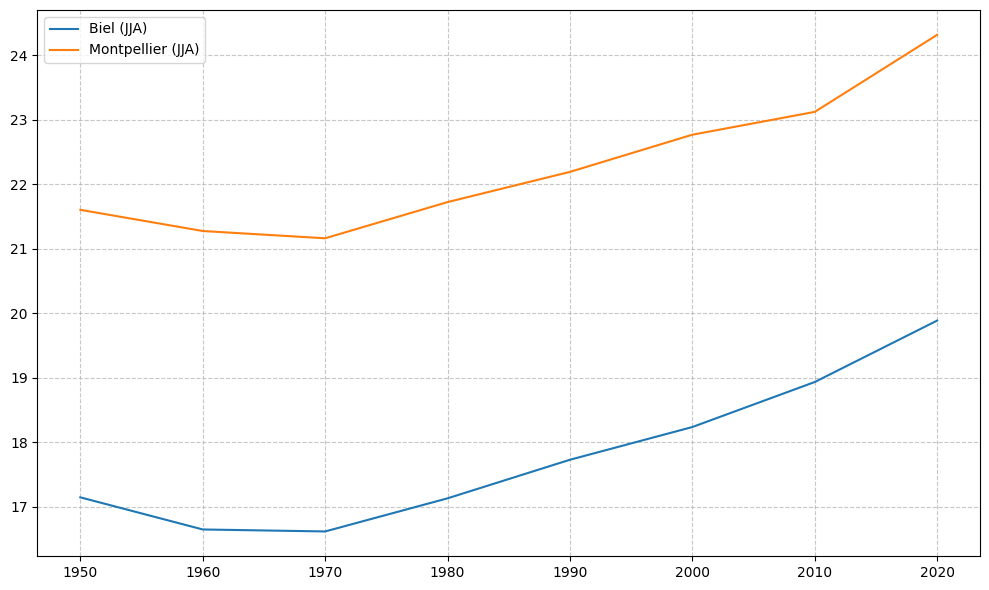

In [18]:
#Checking if the summer mean per decade could be interesting (I prefer the one per year)

JJA_biel['Decade'] = (JJA_biel['Year'] // 10) * 10
JJA_montpellier['Decade'] = (JJA_montpellier['Year'] // 10) * 10

JJA_biel_decade_mean = JJA_biel.groupby('Decade')['Temperature'].mean()
JJA_montpellier_decade_mean = JJA_montpellier.groupby('Decade')['Temperature'].mean()

JJA_decade_combined = pd.DataFrame({
    'Biel': JJA_biel_decade_mean,
    'Montpellier': JJA_montpellier_decade_mean
})

plt.figure(figsize=(10, 6))

plt.plot(JJA_decade_combined.index, JJA_decade_combined['Biel'], label='Biel (JJA)')
plt.plot(JJA_decade_combined.index, JJA_decade_combined['Montpellier'], label='Montpellier (JJA)')

plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\amdw\AppData\Local\Temp\ipykernel_3636\1285134621.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JJA_biel['FiveYearPeriod'] = (JJA_biel['Year'] // 5) * 5
C:\Users\amdw\AppData\Local\Temp\ipykernel_3636\1285134621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  JJA_montpellier['FiveYearPeriod'] = (JJA_montpellier['Year'] // 5) * 5


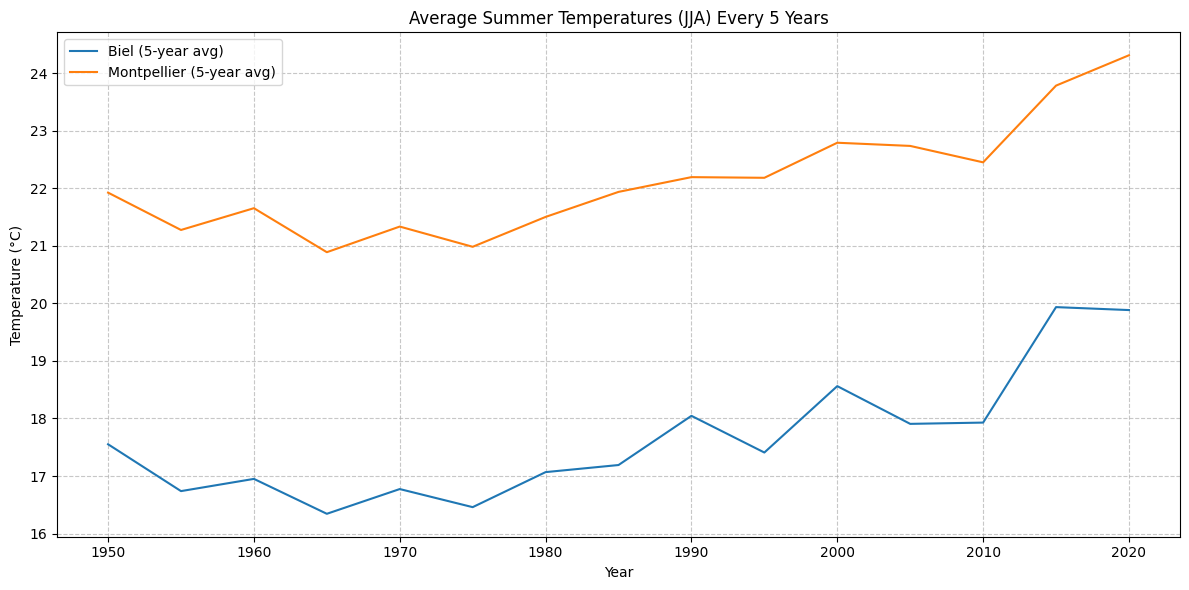

In [18]:
#How about per five years? No.

JJA_biel['FiveYearPeriod'] = (JJA_biel['Year'] // 5) * 5
JJA_montpellier['FiveYearPeriod'] = (JJA_montpellier['Year'] // 5) * 5

JJA_biel_5yr_mean = JJA_biel.groupby('FiveYearPeriod')['Temperature'].mean()
JJA_montpellier_5yr_mean = JJA_montpellier.groupby('FiveYearPeriod')['Temperature'].mean()

JJA_5yr_combined = pd.DataFrame({
    'Biel': JJA_biel_5yr_mean,
    'Montpellier': JJA_montpellier_5yr_mean
})

plt.figure(figsize=(12, 6))

plt.plot(JJA_5yr_combined.index, JJA_5yr_combined['Biel'], label='Biel (5-year avg)')
plt.plot(JJA_5yr_combined.index, JJA_5yr_combined['Montpellier'], label='Montpellier (5-year avg)')

plt.title('Average Summer Temperatures (JJA) Every 5 Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\amdw\AppData\Local\Temp\ipykernel_3636\124055336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_biel['Decade'] = (weather_biel['Year'] // 10) * 10
C:\Users\amdw\AppData\Local\Temp\ipykernel_3636\124055336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_montpellier['Decade'] = (weather_montpellier['Year'] // 10) * 10


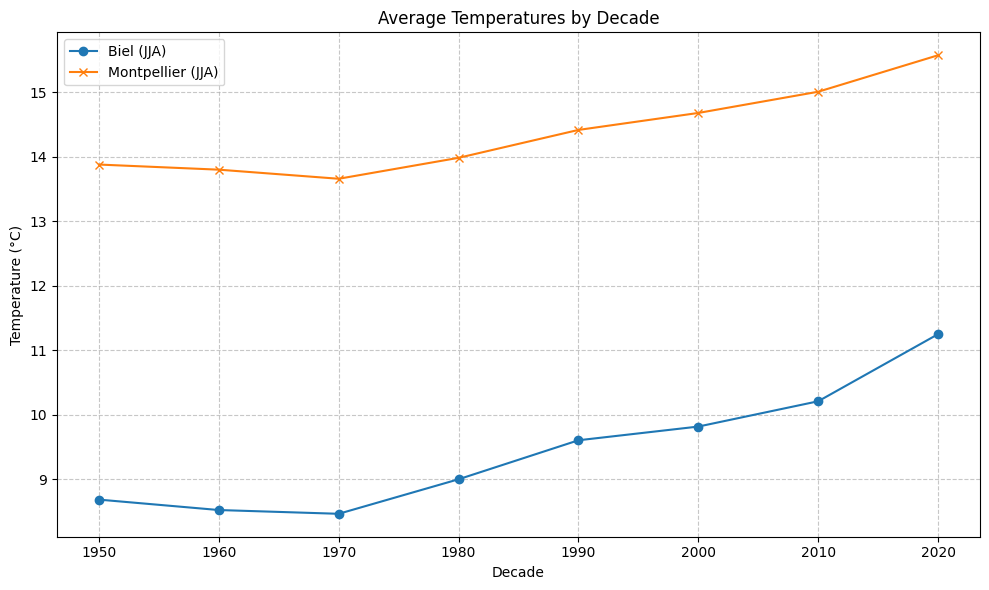

In [17]:
#Checking if the mean per decade for the whole year could be interesting (I still prefer the first one)

weather_biel['Decade'] = (weather_biel['Year'] // 10) * 10
weather_montpellier['Decade'] = (weather_montpellier['Year'] // 10) * 10

weather_biel_mean_decade = weather_biel.groupby('Decade')['Temperature'].mean()
weather_montpellier_mean_decade = weather_montpellier.groupby('Decade')['Temperature'].mean()

weather_mean_combined = pd.DataFrame({
    'Biel': weather_biel_mean_decade,
    'Montpellier': weather_montpellier_mean_decade
})

plt.figure(figsize=(10, 6))

plt.plot(weather_mean_combined.index, weather_mean_combined['Biel'], label='Biel (JJA)', marker='o')
plt.plot(weather_mean_combined.index, weather_mean_combined['Montpellier'], label='Montpellier (JJA)', marker='x')

plt.title('Average Temperatures by Decade')
plt.xlabel('Decade')
plt.ylabel('Temperature (°C)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()